In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [41]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1C1oJiZyyUGcfKqhjUjAo28ko_b8GkbeX/export?format=xlsx")

In [42]:
df

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,314,Badaun,Bilsi,Apple,Apple,Medium,6600.0,6800.0,6700.0,2021-03-01
1,1878,Bijnor,Bijnaur,Apple,Delicious,Medium,6750.0,6850.0,6820.0,2021-03-01
2,1111,Hamirpur,Hamirpur(Nadaun),Apple,Other,Medium,8800.0,9600.0,9200.0,2021-03-01
3,4345,Nashik,Nasik,Apple,Other,FAQ,8000.0,13000.0,10000.0,2021-03-01
4,588,Mainpuri,Mainpuri,Apple,Delicious,Medium,5685.0,5875.0,5780.0,2021-03-01
...,...,...,...,...,...,...,...,...,...,...
297361,25393,Vellore,Vellore,Apple,American,Local,16000.0,16000.0,16000.0,2024-10-31
297362,31748,Kanpur Dehat,Pukharayan,Apple,Delicious,Medium,7300.0,7360.0,7350.0,2024-10-31
297363,27598,Warangal,Warangal,Apple,Delicious,Large,15000.0,15000.0,15000.0,2024-10-31
297364,7699,Jammu,Batote,Apple,Other,Medium,6000.0,8000.0,7000.0,2024-10-31


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297366 entries, 0 to 297365
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Sl no.                     297366 non-null  int64         
 1   District Name              297366 non-null  object        
 2   Market Name                297366 non-null  object        
 3   Commodity                  297366 non-null  object        
 4   Variety                    297366 non-null  object        
 5   Grade                      297366 non-null  object        
 6   Min Price (Rs./Quintal)    297366 non-null  float64       
 7   Max Price (Rs./Quintal)    297366 non-null  float64       
 8   Modal Price (Rs./Quintal)  297366 non-null  float64       
 9   Price Date                 297366 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.7+ MB


In [44]:
grouped_df = df.groupby('Price Date')['Modal Price (Rs./Quintal)'].mean()

In [45]:
grouped_df

,Modal Price (Rs./Quintal)
Price Date,
2021-03-01,7393.395522
2021-03-02,7353.559322
2021-03-03,7538.265306
2021-03-04,7308.750000
2021-03-05,7353.274112
...,...
2024-10-27,8389.777070
2024-10-28,7137.807450
2024-10-29,7286.136281


In [46]:
type(grouped_df)

pandas.core.series.Series

In [47]:
'''
grouped_df = grouped_df.to_frame(name='Modal Price (Rs./Quintal)')

sns.boxplot(y='Modal Price (Rs./Quintal)', data=grouped_df)

plt.title('Boxplot of Modal Price')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.show()
'''

"\ngrouped_df = grouped_df.to_frame(name='Modal Price (Rs./Quintal)')\n\nsns.boxplot(y='Modal Price (Rs./Quintal)', data=grouped_df)\n\nplt.title('Boxplot of Modal Price')\nplt.ylabel('Modal Price (Rs./Quintal)')\nplt.show()\n"

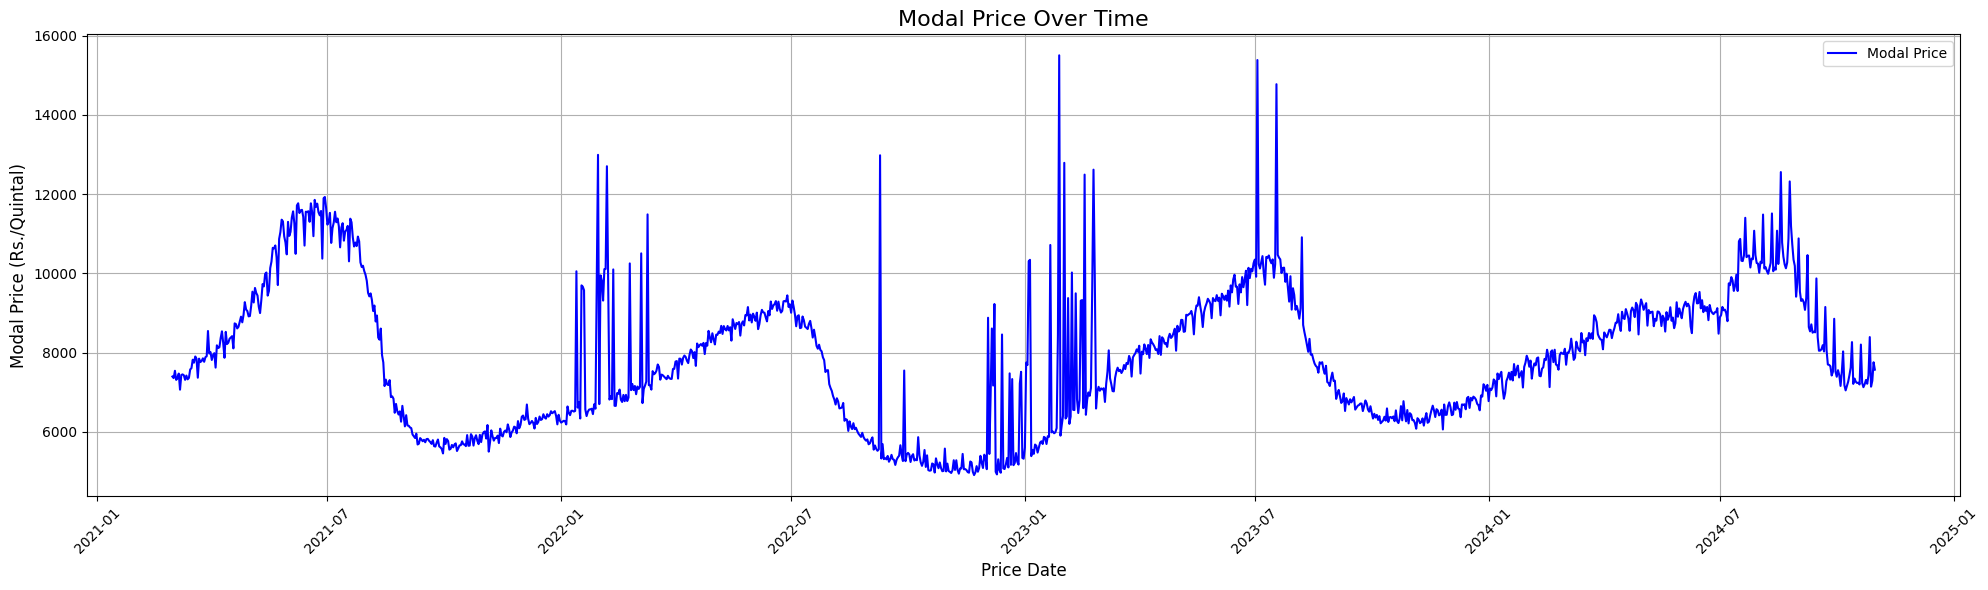

In [48]:
# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(grouped_df.index, grouped_df, label='Modal Price', color='blue')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [49]:
len(grouped_df)

1341

In [50]:
# Define the split time
split1 = round(0.5*len(grouped_df))
split2 = round(0.75*len(grouped_df))

# Get the train set
time_train = grouped_df.index[:split1]
x_train = grouped_df[:split1]

# Get the validation set
time_valid = grouped_df.index[split1:split2]
x_valid = grouped_df[split1:split2]

# Get the test set
time_test = grouped_df.index[split2:]
x_test = grouped_df[split2:]

In [51]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(x_train.values.reshape(-1,1))
x_val_scaled = scaler.fit_transform(x_valid.values.reshape(-1,1))

# Convert the scaled data back into a DataFrame for easier reading
scaled_df = pd.DataFrame(scaled_data, columns=[x_train.name],index=x_train.index)
x_val_scaled_df = pd.DataFrame(x_val_scaled,  columns=[x_valid.name],index=x_valid.index)

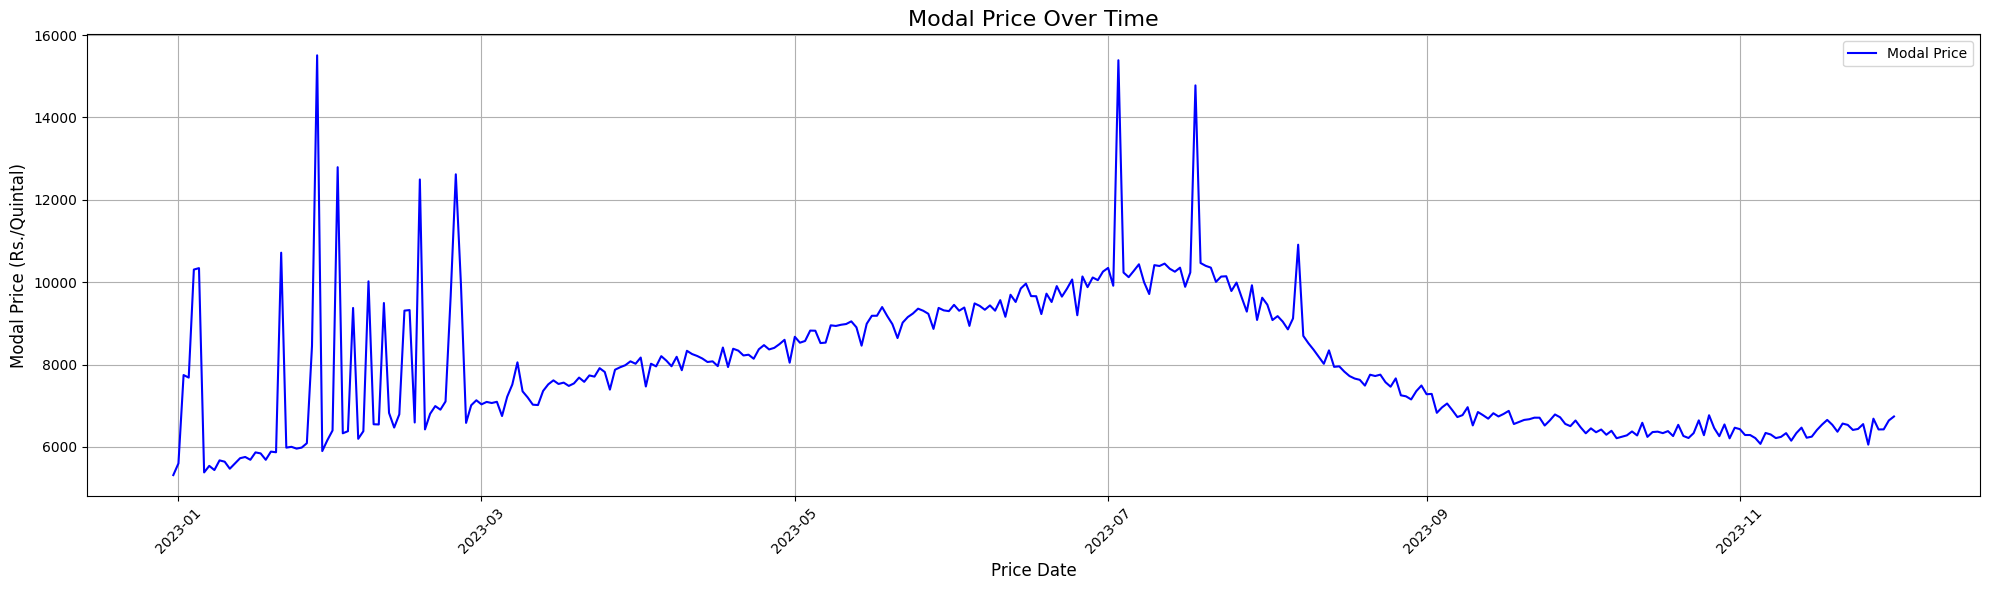

In [52]:
# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(time_valid, x_valid, label='Modal Price', color='blue')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [53]:
# Parameters
window_size = 30
batch_size = 32

In [54]:
def windowed_dataset(series, window_size, batch_size):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    #dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size)

    # Optimize the dataset for training
    dataset = dataset.cache().prefetch(1)

    return dataset

In [55]:
scaled_data.shape

(670, 1)

In [56]:
# Generate the dataset windows
dataset = windowed_dataset(scaled_data, window_size, batch_size)

In [57]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [58]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 30, 1)
shape of second element: (32, 1)


In [59]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
])

# Print the model summary
model_tune.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 30, 64)              │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,601 (131.25 KB)

 Trainable params: 33,601 (131.25 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=200, callbacks=[lr_schedule])


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.5166 - learning_rate: 1.0000e-08
Epoch 2/200


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5163 - learning_rate: 1.1220e-08
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.5188 - learning_rate: 1.2589e-08
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.5162 - learning_rate: 1.4125e-08
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.5152 - learning_rate: 1.5849e-08
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.5140 - learning_rate: 1.7783e-08
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.5150 - learning_rate: 1.9953e-08
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.5166 - learning_rate: 2.2387e-08
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.5156 - learning_rate: 2.5119e-08
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.5158 - learning_rate: 2.8184e-08
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5165 - learning_rate: 3.1623e-08
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss:

(1e-08, 0.1, 0.0, 1.0)

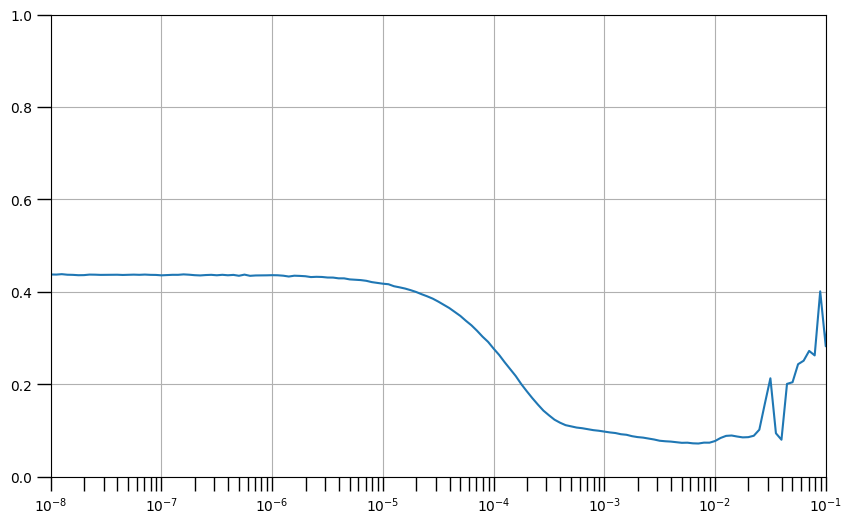

In [61]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(200) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-1, 0, 1])

In [62]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,1)),
    tf.keras.layers.SimpleRNN(40, return_sequences=True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1),
])

# Set the learning rate
learning_rate = 5*1e-3

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4052 - mae: 0.8177
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2747 - mae: 0.6122
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1837 - mae: 0.4976
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1224 - mae: 0.3589
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1070 - mae: 0.3653
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0934 - mae: 0.3461
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0703 - mae: 0.2736
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0896 - mae: 0.3348
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0667 - mae: 0.2702
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0431 - mae: 0.1931
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0540 - mae: 0.2232
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1233 - mae: 0.4099
Epoch 13/100
20/20 ━━━━━━

In [63]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(split2-split1-window_size):
  forecast.append(model.predict(x_val_scaled[time:time + window_size][np.newaxis], verbose=0))

# Slice the points that are aligned with the validation set
#forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 306
shape of the validation set: (336,)


In [64]:
x_val_scaled_df.values.shape

(336, 1)

In [65]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()


shape after converting to numpy array: (306, 1, 1)
shape after squeezing: (306,)


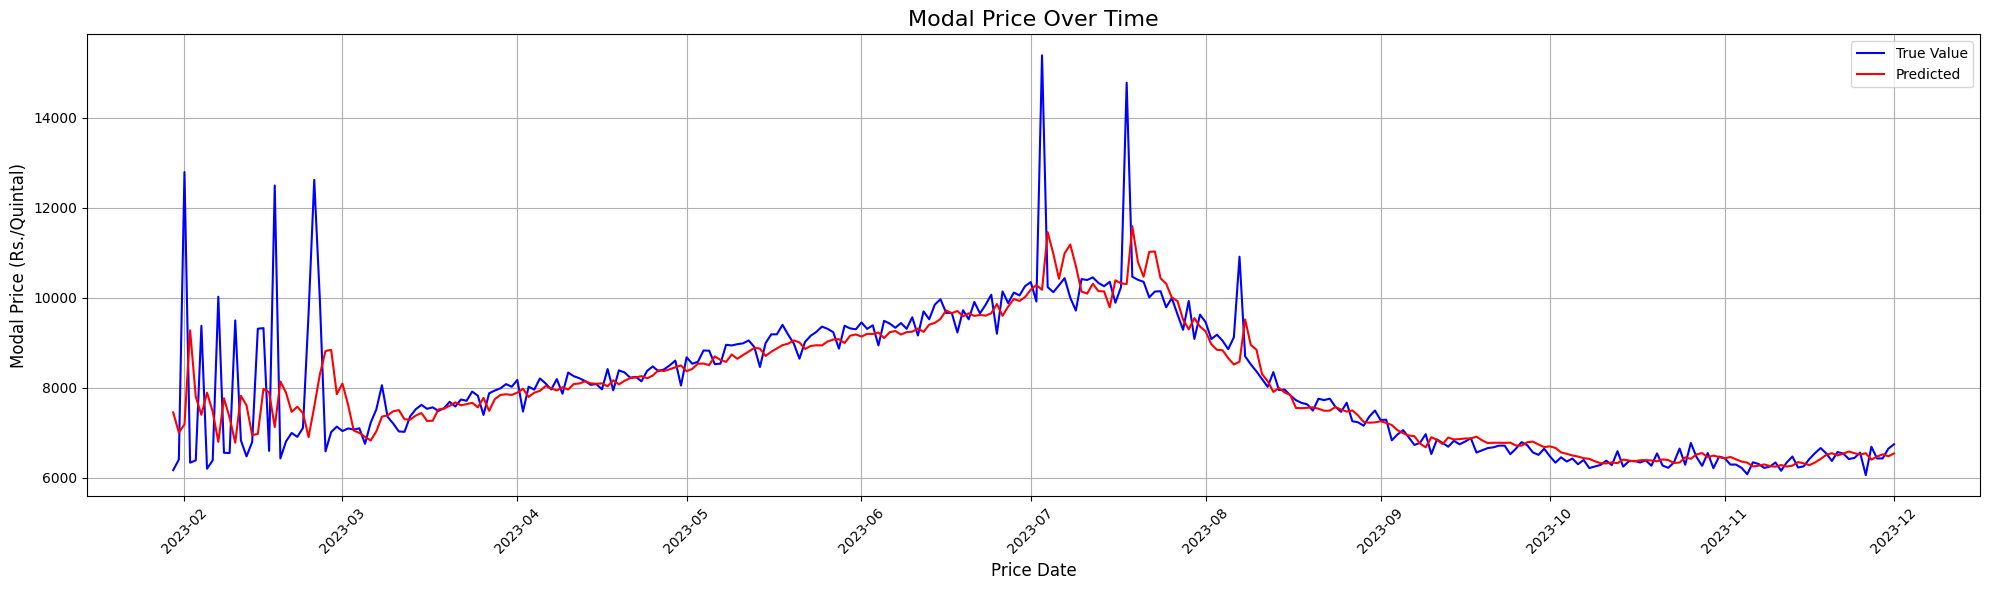

In [66]:
# Reshape results to be 2D (as scaler.inverse_transform expects a 2D array)
results_reshaped = results.reshape(-1, 1)

# Plot the Modal Price against the Price Date
plt.figure(figsize=(20, 6))  # You can adjust the figure size
plt.plot(x_val_scaled_df.index[30:], scaler.inverse_transform(x_val_scaled_df.values[30:].reshape(-1, 1)), label='True Value', color='blue')

# Plot the predicted values (after reshaping)
plt.plot(x_val_scaled_df.index[30:], scaler.inverse_transform(results_reshaped), label='Predicted', color='red')

# Add title and labels
plt.title('Modal Price Over Time', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Modal Price (Rs./Quintal)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [67]:
# Instantiate metric objects
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()

# Compute the metrics
true_values = x_val_scaled_df.values[30:].reshape(-1, 1)
predicted_values = results_reshaped

print("MSE:", mse(true_values, predicted_values).numpy())
print("MAE:", mae(true_values, predicted_values).numpy())


MSE: 0.2915567
MAE: 0.25590235


In [68]:
# Instantiate metric objects
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()

# Compute the metrics
true_values = scaler.inverse_transform(x_val_scaled_df.values[30:].reshape(-1, 1))
predicted_values = scaler.inverse_transform(results_reshaped)

print("MSE:", mse(true_values, predicted_values).numpy())
print("MAE:", mae(true_values, predicted_values).numpy())


MSE: 782215.8
MAE: 419.1564
